# CaBER Data Resizing Showcase

In [2]:
import sys
sys.path.append('../')
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from bezier import resize_dataset # In your own code, change to: "from caber_image_processing import resize_dataset"

After radius data is acquired by processing a set of images or video, it can be fit to an euqation. To speed this process, the dataset of fitting points is downsized to a percetnage of its original value designated by the pct_of_data_to_use parameter. By default, this resizing is done by sampling uniformly in time. It can also be done along the arc length of a curve in attempt to capture particular features of the curve.

In [4]:
# Generate a graph of data points
x = np.expand_dims(np.arange(1000), 1) / 500
y = x**4 - 4*x**2 + 1
points = np.concatenate((x, y), axis=1)

In [5]:
# New dataset size
n = 20

In [6]:
# Resize points using Bezier curves
resized_points_bezier = resize_dataset(points, n, arc_length_method=False)

To resize the data, Bezier curves are made between all datapoints found from processing. These curves allow the selection of datapoints between two recorded points, ensuring truly uniform sampling. For N processed points, N-1 curves are made. The total time of the experiment is divided by the desired number of points to find the distance between each selected point.

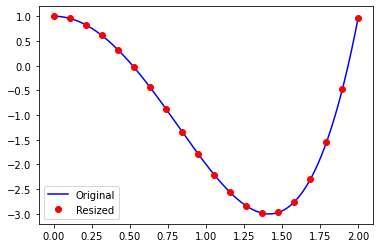

In [7]:
# Plot dataset resized with Bezier curves
resized_x = [p[0] for p in resized_points_bezier]
resized_y = [p[1] for p in resized_points_bezier]
plt.plot(x, y, "b-")
plt.plot(resized_x, resized_y, 'ro')
plt.legend(['Original', 'Resized'])

The default selection method is displayed above across a sample polynomial curve. In practice, the blue line will be an inconnected set of Bezier curves derived between the radius points acquired through image or video processing. As you can see, the downsized dataset captures featues well at minimums and maximums but has less points across regions with a steep slope.

In [8]:
# Resize dataset using arc length approximation method
resized_points_arc = resize_dataset(points, n, arc_length_method=True)

Datasets can also be resized along arc length. To do this, total arc length across the time domain is approximated with linear curves between each point. This cumulative value is divided by the desired number of points in the downsized dataset. Then, linear curves are iterated to place new datapoints along the curve with the desired constant arc length between them. The calculation is not perfect because approximations are linear, but it offers a time-efficient alternative to the Bezier method.

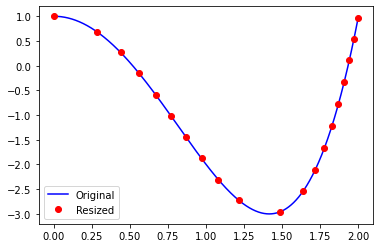

In [9]:
# Plot dataset resized with arc length
resized_x = [p[0] for p in resized_points_arc]
resized_y = [p[1] for p in resized_points_arc]
plt.plot(x, y, "b-")
plt.plot(resized_x, resized_y, 'ro')
plt.legend(['Original', 'Resized'])

Notice how the original selection method captures the features of a minima well, but points are more separated along a steep linear curve. The second method (using arc length) samples the steep slope well, but has trouble at the minima. Choice of resizing method depends on application / data shape, but generally the Bezier method is better for fitting